#### Analysis goal
##### df[0] 
- 최종분석목표
- CPU와 GPU의 년간 Freq와 TDP의 상관도가 있는가
- CPU와 GPU가 무어의 법칙을 따르는가 - 무어의 법칙을 설명해야함
- 세계 CPU and GPU성능에 따른 대한민국 반도체 및 디스플레이 동향파악
- 대한민국 반도체, 디스플레이 시장이 CPU와 GPU의 연관성
- DRAM은 CPU, GPU의 연관성
- 반도체 시장은 CPU, GPU의 연관성
- 디스플레이 시장은 CPU, GPU의 연관성
- (CPU는 반도체 시장과 연관이 있고, GPU는 디스플레이 시장과 연관이 있을꺼라는 추측)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [5]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

In [6]:
with open('mydataframe.pickle', 'rb') as f:
    df = pickle.load(f)
    
chip_data = df[0].reset_index()
chip_data

,년도,Process Size(nm)_CPU,Process Size(nm)_GPU,Transistors (million)_CPU,Transistors (million)_GPU,Freq (MHz)_CPU,Freq (MHz)_GPU
0,2004,109.705882,121.384615,104.213235,332.938462,2267.705882,367.376923
1,2005,92.954545,112.315789,230.584416,294.684211,2409.831169,405.273684
2,2006,75.925926,93.178295,478.266667,348.031008,2370.696296,460.472868
3,2007,70.869565,80.031646,398.014493,388.797468,2180.652174,524.360759
4,2008,58.571429,63.439306,606.089286,566.826590,2287.241071,564.190751
5,2009,45.913043,52.783019,533.860870,613.830189,2519.904348,584.584906
6,2010,40.576389,42.870748,539.958333,972.979592,2477.243056,613.741497
7,2011,33.465409,39.280702,976.616352,1228.198830,2355.496855,641.356725
8,2012,27.455696,33.653179,1602.253165,1685.982659,2604.468354,696.046243
9,2013,25.007143,28.971292,1577.800000,2150.435407,2377.207143,744.693780


/tmp/ipykernel_3070/701193906.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_xticklabels(chip_data['년도'], rotation = 45)
/tmp/ipykernel_3070/701193906.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_xticklabels(chip_data['년도'], rotation = 45)
/tmp/ipykernel_3070/701193906.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_xticklabels(chip_data['년도'], rotation = 45)


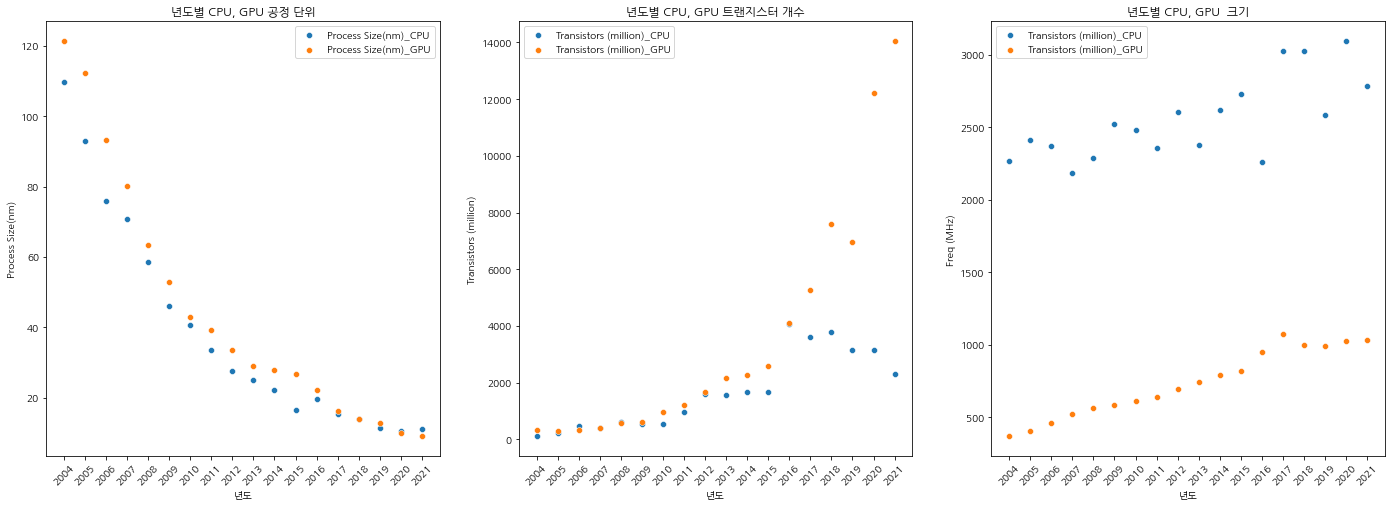

In [35]:
# 데이터 년도별 분석

fig, axes = plt.subplots(1,3, figsize = (24,8))

m = sns.scatterplot(data = chip_data, x = '년도', y = 'Process Size(nm)_CPU', ax = axes[0])
sns.scatterplot(data = chip_data, x = '년도', y = 'Process Size(nm)_GPU', ax = axes[0])

axe = m.axes
axe.set_xticklabels(chip_data['년도'], rotation = 45)
axe.set_title('년도별 CPU, GPU 공정 단위')
axe.set_ylabel('Process Size(nm)')

axes[0].legend(labels=["Process Size(nm)_CPU","Process Size(nm)_GPU"])
# CPU와 GPU모두 공정 단위는 급수적으로 감소하고 있다.

# axes[1]
g = sns.scatterplot(data = chip_data, x = '년도', y = 'Transistors (million)_CPU', ax = axes[1])
sns.scatterplot(data = chip_data, x = '년도', y = 'Transistors (million)_GPU', ax = axes[1])

axe = g.axes
axe.set_xticklabels(chip_data['년도'], rotation = 45)
axe.set_title('년도별 CPU, GPU 트랜지스터 개수')
axe.set_ylabel('Transistors (million)')

axes[1].legend(labels=["Transistors (million)_CPU","Transistors (million)_GPU"])

# 2018년도부터 GPU의 연산속도를 높이기 위해 급격하게 Transistor의 갯수를 많이 넣고있다. ==> 이유 : AI가 주목받기 시작한 시점부터
# CPU도 2018년도까지 무어의 법칙을 따르다가  2018년도부터는 반대로 트랜지스터의 개수가 줄어들고 있다. ==> 이유 : 기술적 한계
# CPU는 기술이 성숙기에 다 접어들었다고 생각

# axes[2]

a = sns.scatterplot(data = chip_data, x = '년도', y = 'Freq (MHz)_CPU', ax = axes[2])
sns.scatterplot(data = chip_data, x = '년도', y = 'Freq (MHz)_GPU', ax = axes[2])

axe = a.axes
axe.set_xticklabels(chip_data['년도'], rotation = 45)
axe.set_title('년도별 CPU, GPU  크기')
axe.set_ylabel('Freq (MHz)')

axes[2].legend(labels=["Transistors (million)_CPU","Transistors (million)_GPU"])

# CPU는 GPU보다 비교적 high 주파수를 활용하고 있고, GPU의 주파수도 점점 catch up하는 중이다.

In [47]:
# EDA에서 본 결과들 정밀 분석

#GPU 상관도 측정

corr_GPU_tran = np.corrcoef(chip_data['Transistors (million)_GPU'], chip_data['Freq (MHz)_GPU'])[0,1]
print('GPU의 트랜지스터와 주파수 상관도 : ', corr_GPU_tran)

corr_GPU_proc = np.corrcoef(chip_data['Process Size(nm)_GPU'], chip_data['Transistors (million)_GPU'])[0,1]
print('GPU의 단위 공정과 트랜지스터 상관도 : ', corr_GPU_proc)

corr_GPU_freq = np.corrcoef(chip_data['Process Size(nm)_GPU'], chip_data['Freq (MHz)_GPU'])[0,1]
print('GPU의 단위 공정과 주파수 상관도 : ', corr_GPU_proc)

##########################################################################################
#CPU 상관도 측정

corr_CPU_tran = np.corrcoef(chip_data['Transistors (million)_CPU'], chip_data['Freq (MHz)_CPU'])[0,1]
print('CPU의 트랜지스터와 주파수 상관도 : ', corr_CPU_tran)

corr_CPU_proc = np.corrcoef(chip_data['Process Size(nm)_CPU'], chip_data['Transistors (million)_CPU'])[0,1]
print('CPU의 단위 공정과 트랜지스터 상관도 : ', corr_CPU_proc)

corr_CPU_freq = np.corrcoef(chip_data['Process Size(nm)_CPU'], chip_data['Freq (MHz)_CPU'])[0,1]
print('CPU의 단위 공정과 주파수 상관도 : ', corr_CPU_freq)

# 0.7이상인 것 == GPU의 트랜지스터와 주파수 상관도, CPU의 단위 공정과 트랜지스터 상관도

GPU의 트랜지스터와 주파수 상관도 :  0.8172249748388621
GPU의 단위 공정과 트랜지스터 상관도 :  -0.6728495023009691
GPU의 단위 공정과 주파수 상관도 :  -0.6728495023009691
CPU의 트랜지스터와 주파수 상관도 :  0.6416900063411868
CPU의 단위 공정과 트랜지스터 상관도 :  -0.783210619089342
CPU의 단위 공정과 주파수 상관도 :  -0.6482582509198672
